# **Machine Learning Applications Final Project Dash**

Date: May 9, 2023

Authors: Óscar Montoya Amores (100451858), Javier Serrano Sánchez-Ocaña (100451673), Miguel Ángel Ponce Martínez (100451309)

#### **LIBRARIES IMPORT**

In [1]:
import joblib

from jupyter_dash import JupyterDash
from dash import dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc
import plotly.graph_objs as go
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import plotly.express as px
import pandas as pd
import numpy as np

# import gensim
import pyLDAvis.gensim as gensimvis
import pyLDAvis

import random
from io import BytesIO

from wordcloud import WordCloud
import base64

PLOTS A IMPLEMENTAR, BORRAR CUANDO ESTE ACABADO:

-LDA CON LOS TÓPICOS DEPENDIENDO DE CADA GENERO, ES DECIR PODER ELEGIR QUE GENERO PLOTEAR Y QUE SALGAN LAS PALABRAS Q CONFORMAN EL TOPICO

In [2]:
df = pd.read_csv('clean_songs.csv')
# print(df.columns)

ldag = joblib.load("lda_model.joblib")

from gensim.corpora import Dictionary

dictionary_file = "dictionary.gensim"
D = Dictionary.load(dictionary_file)
from gensim import corpora
# load the corpus from file
corpus = corpora.MmCorpus('corpus.mm')

corpus_words = [[D[word_id] for word_id, count in doc] for doc in corpus]

"""
print(len(corpus))
print(type(ldag))
print(type(corpus))
print(corpus_words[1])
print(type(D))
print("wa" in corpus_words[0])
"""
# print(type(ldag))
# print(type(corpus))
# print(corpus_words[0])
# print(type(D))
# print("wa" in corpus_words[0])

# Visualize topics using pyLDAvis
vocab = {D[i]: i for i in range(len(D))}
vocab2 = {i: D[i] for i in range(len(D))}
term_frequency = {D[i]: freq for i, freq in D.cfs.items()}
term_frequency = pd.Series(term_frequency)
vis = gensimvis.prepare(ldag, corpus, D, mds='tsne', vocab=vocab2, sort_topics=False, term_frequency=term_frequency)

In [3]:
#Open probs df for roc curves, and Y
probs_df = joblib.load("probs_df.joblib")
Y = joblib.load("Y.joblib")
random.seed(33)
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Y, Y, test_size=0.3, random_state=33)

In [37]:
#0. Obtain genres
genres = df['type'].unique().tolist()
print(genres)
#1. Obtain the Indices of each song genre
typeSer = df['type']
rock_idx  = typeSer[typeSer == 'rock'].index.tolist()
country_idx  = typeSer[typeSer == 'country'].index.tolist()
rb_idx  = typeSer[typeSer == 'R&B'].index.tolist()
rap_idx  = typeSer[typeSer == 'rap & hip hop'].index.tolist()
#2. Generate list including all the words per genre
rock_w = []
for s in rock_idx:
    rock_w += corpus_words[s]
country_w = []
for s in country_idx:
    country_w += corpus_words[s]
rb_w = []
for s in rb_idx:
    rb_w += corpus_words[s]
rap_w = []
for s in rap_idx:
    rap_w += corpus_words[s]

#3. Generate Frequence Dataframe
rock_freq = {}
# iterating over the list
for item in rock_w:
   # checking the element in dictionary
   if item in rock_freq:
      # incrementing the counr
      rock_freq[item] += 1
   else:
      # initializing the count
      rock_freq[item] = 1 

df_rock = pd.DataFrame({'word': list(rock_freq.keys()), 'freq': list(rock_freq.values())})

country_freq = {}
# iterating over the list
for item in country_w:
   # checking the element in dictionary
   if item in country_freq:
      # incrementing the counr
      country_freq[item] += 1
   else:
      # initializing the count
      country_freq[item] = 1 

df_country = pd.DataFrame({'word': list(country_freq.keys()), 'freq': list(country_freq.values())})

rb_freq = {}
# iterating over the list
for item in rb_w:
   # checking the element in dictionary
   if item in rb_freq:
      # incrementing the counr
      rb_freq[item] += 1
   else:
      # initializing the count
      rb_freq[item] = 1 

df_rb = pd.DataFrame({'word': list(rb_freq.keys()), 'freq': list(rb_freq.values())})

rap_freq = {}
# iterating over the list
for item in rap_w:
   # checking the element in dictionary
   if item in rap_freq:
      # incrementing the counr
      rap_freq[item] += 1
   else:
      # initializing the count
      rap_freq[item] = 1 

df_rap = pd.DataFrame({'word': list(rap_freq.keys()), 'freq': list(rap_freq.values())})

['rock', 'country', 'R&B', 'rap & hip hop']


In [5]:
dfm = pd.DataFrame({'word': ['apple', 'pear', 'orange','Nano'], 'freq': [1,3,9,20]})
dfm2 = pd.DataFrame({'word': ['apple', 'pear', 'orange','Vettel'], 'freq': [1,3,9,20]})

Dash is running on http://127.0.0.1:8050/



c:\Users\migue\anaconda4\envs\finalML\lib\site-packages\jupyter_dash\jupyter_app.py:310: DeprecationWarning:

setDaemon() is deprecated, set the daemon attribute instead



Dash app running on http://127.0.0.1:8050/


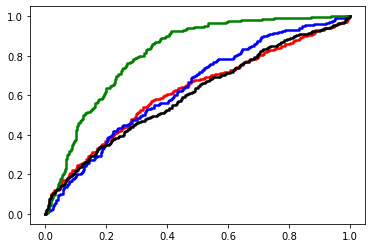

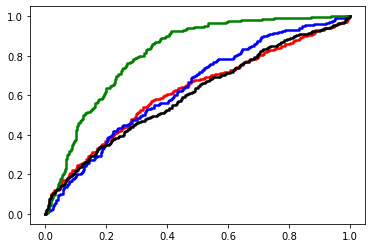

c:\Users\migue\anaconda4\envs\finalML\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

c:\Users\migue\anaconda4\envs\finalML\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

c:\Users\migue\anaconda4\envs\finalML\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

c:\Users\migue\anaconda4\envs\finalML\lib\site-packages\wordcloud\wordcloud.py:106: Matplot

In [25]:
# Initialize the Dash app
app = JupyterDash(__name__)

server = app.server

# Define the layout of the Dash app
app.layout = html.Div([
    html.H1("Song Lyrics Wordcloud by Genre"),
    dcc.Dropdown(
        id='dropdown_words',
        options=[{'label': f'Genre: {i}', 'value': i} for i in genres],
        value=genres[0]
    ),
    html.Img(id="image_wc"),
    html.H1("Song Genre Topic Modeling"),
    dcc.Dropdown(
        id='dropdown',
        options=[{'label': 'Topic {}'.format(i), 'value': i} for i in range(ldag.num_topics)],
        value=0
    ),
    dcc.Graph(id='topic-type-plot'),
    html.Iframe(
        id='pyldavis',
        srcDoc=pyLDAvis.prepared_data_to_html(vis),
        style={'width': '100%', 'height': '800px'}
    ),
    dbc.Row([dcc.Dropdown(
        id = 'roc_model',
        options=[{'label': i, 'value' : i} for i in list(set(probs_df["MODELS"]))], multi = False, value=list(set(probs_df["MODELS"]))[0]),
    dcc.Dropdown(id = 'roc_classifier',
        options=[{'label': i, 'value' : i} for i in list(set(probs_df["CLASSIFIER"]))], multi = False, value=list(set(probs_df["CLASSIFIER"]))[0])
        ]),
    
    dcc.Graph(id='roc-curves')
])

#Creation of WordCloud
@app.callback(
    Output('image_wc', 'src'), 
    [Input('image_wc', 'id'), 
     Input('dropdown_words', 'value')]
)

def make_image(b, gr):
    img = BytesIO()
    if gr == 'rock':
        plot_wordcloud(data=df_rock).save(img, format='PNG')
    elif gr == 'country':
        plot_wordcloud(data=df_country).save(img, format='PNG')
    elif gr == 'R&B':
        plot_wordcloud(data=df_rb).save(img, format='PNG')
    else:
        plot_wordcloud(data=df_rap).save(img, format='PNG')
    return 'data:image/png;base64,{}'.format(base64.b64encode(img.getvalue()).decode())

def plot_wordcloud(data):
    d = {a: x for a, x in data.values}
    wc = WordCloud(colormap='prism', background_color='black', width=1900, height=640)#.generate(' '.join(data))
    wc.fit_words(d)
    return wc.to_image()

# Define the update functions for the Dash app
@app.callback(
    Output('pyldavis', 'srcDoc'),
    Input('dropdown', 'value')
)
def update_pyldavis(selected_topic):
    return pyLDAvis.prepared_data_to_html(vis)

@app.callback(
    Output('topic-type-plot', 'figure'),
    Input('dropdown', 'value')
)
def update_topic_type_plot(selected_topic):
    # Get the top 20 words for the selected topic
    top_words = ldag.show_topic(selected_topic, topn=2)
    # print(top_words)
    top_words = [word[0] for word in top_words]
    if "wa" in top_words:
        top_words.remove("wa")
    # print(top_words)
    # Find the indices of the songs in the corpus that contain any of the top 20 words for the selected topic
    indices = []
    # print(len(corpus_words))
    """
    i = 0
    while i<len(corpus_words):
        for word in top_words:
            if word!="wa":
                if word in corpus_words[i]:
                    #print(word)
                    indices.append(i)
                    break
        i+=1
    """

    for i in range(len(corpus_words)):
        j=0
        for word in top_words:
            if word in corpus_words[i]:
                j+=1
        if j==len(top_words):
            indices.append(i)
            
    # print(indices)
    # Filter the dataframe to include only songs with indices in the list of indices
    topic_df = df[df.index.isin(indices)]
    # print(topic_df)
    # Check if any songs match the selected topic
    if topic_df.empty:
        return {'data': [], 'layout': {}}
    # Get the genre of each song in the selected topic
    genres = [genre for genre in topic_df['type']]
    # Count the number of songs in each genre for the selected topic
    genre_counts = pd.Series(genres).value_counts().sort_index()
    # Create the plot
    fig = {
        'data': [{'x': genre_counts.index, 'y': genre_counts.values, 'type': 'bar', 'marker': {'color': ['red', 'green', 'blue', 'orange']}}],
        'layout': {'title': f'Topic {selected_topic} {top_words} Song Genres by LDA' ,'xaxis': {'title': 'Genre'}, 'yaxis': {'title': 'Count'}}
    }
    return fig

@app.callback(
    Output('roc-curves', 'figure'),
    [Input('roc_model', 'value'),
     Input('roc_classifier', 'value')])
def draw_roc(model, classifier):
    model_df = probs_df.index[probs_df['MODELS']==model].tolist()
    classifier_df = probs_df.index[probs_df['CLASSIFIER']==classifier].tolist()
    for i in model_df:
        if i in classifier_df:
            index = i
    selected_roc = probs_df.iloc[index,:]
    prob = selected_roc["PROBS"]

    fpr0, recall0, thresholds0 = metrics.roc_curve(y_test, prob[:,0], pos_label=0) 
    fpr1, recall1, thresholds1 = metrics.roc_curve(y_test, prob[:,1], pos_label=1) 
    fpr2, recall2, thresholds2 = metrics.roc_curve(y_test, prob[:,2], pos_label=2) 
    fpr3, recall3, thresholds3 = metrics.roc_curve(y_test, prob[:,3], pos_label=3) 

    Y_decoded = encoder.inverse_transform([0,1,2,3]) 

    # Create a subplot
    fig, ax = plt.subplots()

    # Plot the ROC curves
    fpr_list = [fpr0, fpr1, fpr2, fpr3]
    recall_list = [recall0, recall1, recall2, recall3]
    color_list = ['red', 'blue', 'green', 'black']
    label_list = [f'ROC curve {Y_decoded[i]}' for i in range(len(Y_decoded))]

    for fpr, recall, color, label in zip(fpr_list, recall_list, color_list, label_list):
        ax.plot(fpr, recall, lw=2.5, label=label, color=color)

    # Convert the plot to a plotly figure
    plotly_fig = go.Figure()
    for trace in fig.get_axes()[0].lines:
        plotly_fig.add_trace(
            go.Scatter(x=trace.get_xdata(), y=trace.get_ydata(), mode='lines', name=trace.get_label(), line=dict(color=trace.get_color()))
    )
    # Add a title to the plot
    plotly_fig.update_layout(title="Different ROC Curves by Genre depending on the Model and Classifier used")
    plotly_fig.update_xaxes(title_text='False Positive Rate')
    plotly_fig.update_yaxes(title_text='True Positive Rate(Recall)')

    return plotly_fig


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

